In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import levene, ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
from scipy import stats
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
import wrangle as w
import re
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
df=w.get_explore_data()

In [4]:
df=w.prep_data(df, features=w.features)

In [5]:
df=w.rename_data(df)

In [6]:
df

,region,elevation,lat,lon,startdate,potential_evap,precip,barometric_pressure,all_atmos_precip,relative_humidity,sea_level_press,mean_temp,height_10_mb,height_100_mb,height_500_mb,height_850_mb,zonal_wind_250mb,zonal_wind_925mb,long_wind_250mb,long_wind_925mb
0,BSh,200,0.0,0.833333,2014-09-01,237.00,94.31,98644.97,42.45,81.72,101352.08,28.744480,31246.63,16666.81,5899.66,1535.52,-2.56,-5.22,-3.52,4.41
1,BSh,200,0.0,0.833333,2014-09-02,228.90,100.85,98686.80,42.66,82.56,101396.02,28.370585,31244.78,16667.31,5901.03,1538.00,-2.39,-5.20,-4.49,3.74
2,BSh,200,0.0,0.833333,2014-09-03,220.69,101.25,98712.85,43.23,83.29,101429.25,28.133059,31239.27,16668.39,5902.18,1540.32,-2.76,-5.00,-5.44,3.40
3,BSh,200,0.0,0.833333,2014-09-04,225.28,101.90,98711.70,43.11,83.26,101440.85,28.256798,31232.86,16667.39,5903.07,1541.10,-3.00,-4.61,-5.76,3.29
4,BSh,200,0.0,0.833333,2014-09-05,237.24,82.95,98686.46,42.98,82.50,101419.53,28.372353,31226.16,16665.65,5903.36,1539.73,-3.40,-4.25,-6.09,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,Dfb,100,1.0,0.866667,2016-08-27,312.05,57.45,97613.96,24.32,70.25,101373.91,17.150954,31484.23,16540.22,5763.23,1501.92,23.20,1.32,9.59,2.96
375730,Dfb,100,1.0,0.866667,2016-08-28,305.82,53.53,97631.29,23.92,71.08,101397.77,16.962051,31476.67,16534.71,5760.19,1502.70,23.18,1.40,7.14,2.30
375731,Dfb,100,1.0,0.866667,2016-08-29,311.62,52.12,97588.69,23.94,69.74,101368.67,16.915474,31464.71,16526.98,5754.76,1499.57,24.49,1.75,7.05,2.19
375732,Dfb,100,1.0,0.866667,2016-08-30,304.54,51.73,97538.62,23.61,69.71,101321.24,16.536761,31448.83,16512.39,5742.21,1493.14,25.80,1.84,7.74,1.88


In [7]:
df.shape

(375734, 20)

In [8]:
df['region_encoded'] = df.region.map({'BWh': 'Dry',
                                      'BWk': 'Dry',
                                      'Bsh': 'Dry',
                                      'BSk': 'Dry', 
                                      'Csa':'Temperate', 
                                      'Csb':'Temperate', 
                                      'Cfa':'Temperate', 
                                      'Cfa':'Temperate',
                                      'Dsb':'Continental', 
                                      'Dsc':'Continental', 
                                      'Dwa':'Continental', 
                                      'Dwb':'Continental', 
                                      'Dfa':'Continental', 
                                      'Dfb':'Continental', 
                                      'Dfc':'Continental'})

In [9]:
df.shape

(375734, 21)

In [10]:
train, validate, test=w.split_data(df, test_size=0.15)

In [11]:
train.head()

,region,elevation,lat,lon,startdate,potential_evap,precip,barometric_pressure,all_atmos_precip,relative_humidity,...,mean_temp,height_10_mb,height_100_mb,height_500_mb,height_850_mb,zonal_wind_250mb,zonal_wind_925mb,long_wind_250mb,long_wind_925mb,region_encoded
116277,BSk,1800,0.454545,0.300000,2014-10-19,294.86,0.03,83362.52,8.53,28.94,...,16.680867,30825.95,16475.47,5796.30,1504.26,18.22,-0.87,3.46,2.04,Dry
237629,Csb,1100,0.727273,0.066667,2014-10-25,127.70,63.74,89156.29,16.71,83.14,...,5.987106,30801.60,16340.47,5689.14,1504.33,24.22,1.52,1.08,3.10,Temperate
272599,BSk,800,0.772727,0.700000,2016-06-29,481.48,41.43,89665.38,22.36,54.72,...,21.549640,31605.85,16624.04,5828.97,1492.70,23.68,-0.08,2.35,1.04,Dry
205713,Dfb,2000,0.636364,0.500000,2015-06-30,453.35,24.78,77957.43,17.11,47.80,...,19.173942,31576.02,16662.35,5875.87,1505.58,15.35,0.50,5.52,1.09,Continental
120041,BSk,1900,0.454545,0.466667,2015-02-05,135.47,0.00,81613.28,6.06,62.50,...,6.862285,30715.39,16357.43,5755.62,1535.91,19.55,0.42,-10.67,0.27,Dry


In [12]:
train.shape

(244226, 21)

<AxesSubplot:xlabel='height_500_mb', ylabel='Count'>

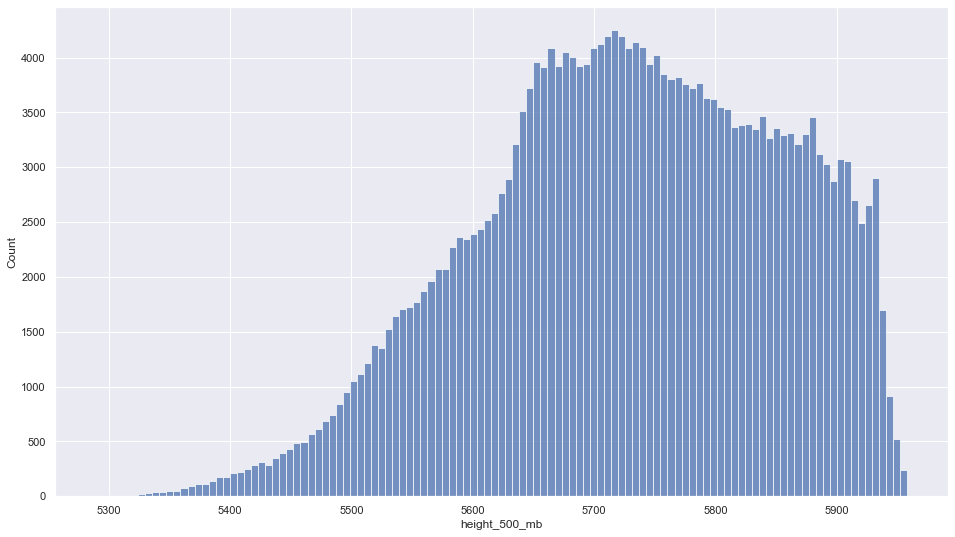

In [13]:
sns.histplot(data=train, x="height_500_mb")

In [14]:
sns.countplot(x="height_500_mb", data = train).set(title='?')

[Text(0.5, 1.0, '?')]

Error in callback <function flush_figures at 0x105d8e160> (for post_execute):


Exception ignored in: <generator object iter_fields at 0x167bede40>
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.9/ast.py", line 251, in iter_fields
    yield field, getattr(node, field)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
sns.histplot(data=train, x="potential_evap")

In [ ]:
sns.histplot(data=train, x="barometric_pressure")

In [ ]:
sns.histplot(data=train, x="all_atmos_precip")

In [ ]:
sns.histplot(data=train, x="relative_humidity")

In [ ]:
sns.histplot(data=train, x="sea_level_press")

In [ ]:
sns.histplot(data=train, x="mean_temp")

In [ ]:
sns.histplot(data=train, x="height_10_mb")

In [ ]:
sns.histplot(data=train, x="height_100_mb")

In [ ]:
sns.histplot(data=train, x="height_500_mb")

In [ ]:
sns.histplot(data=train, x="height_850_mb")

In [ ]:
sns.histplot(data=train, x="zonal_wind_250mb")

In [ ]:
sns.histplot(data=train, x="zonal_wind_925mb")

In [ ]:
sns.histplot(data=train, x="long_wind_250mb")

In [ ]:
sns.histplot(data=train, x="long_wind_925mb")

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))      
corr = train.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [ ]:
train.groupby('region').mean_temp.mean()


In [ ]:
sns.countplot(x ='region', data = train).set(title='What is the distribution of the observations per Region?')

In [ ]:
sns.barplot(x='height_500_mb', y='mean_temp', data= train)

In [ ]:
train.head()

In [ ]:
train.head()

In [ ]:
Dry = train[train.region_bins == 'Dry']
Temperate = train[train.region_bins == 'Temperate']
Continental = train[train.region_bins == 'Continental']

In [ ]:
# Using + operator to combine two columns
train["latlon"] = train['lat'].astype(str) +", "+ train["lon"].astype(str)

In [ ]:
train.head()

In [ ]:
stats.kruskal(Dry.mean_temp, Temperate.mean_temp, Continental.mean_temp)

In [ ]:
train.groupby('region').latlon.value_counts()

In [ ]:
sns.countplot(x ='region_bins', data = train).set(title='Are the 3 major regions represented equally?')

In [ ]:
sns.barplot(data=train, x="height_500_mb", y='mean_temp').set(title='?')

In [ ]:
nums = ['potential_evap','precip','barometric_pressure','all_atmos_precip','relative_humidity','sea_level_press','mean_temp','height_10_mb','height_100_mb','height_500_mb','height_850_mb','zonal_wind_250mb','zonal_wind_925mb','long_wind_250mb','long_wind_925mb']
target = ['mean_temp']

In [ ]:
def explore_nums(train, nums):
    '''
    This function takes in:
            train = train DataFrame
            nums = numerical columns (as a list of strings)
    '''
    for col in nums:
        sns.histplot(x=col, data=train)
        plt.show()
        

In [ ]:
explore_nums(train, nums)

In [ ]:
['potential_evap','precip','barometric_pressure','all_atmos_precip','relative_humidity','sea_level_press','mean_temp','height_10_mb','height_100_mb','height_500_mb','height_850_mb','zonal_wind_250mb','zonal_wind_925mb','long_wind_250mb','long_wind_925mb']

----
## Data Dictionary:
| Target | Definition | Data Type | Unit |
| ---- | ---- | ---- | ---- |
| mean_temp| the arithmetic mean | float64 | celsius |

| Feature Name | Definition | Data Type | Unit |
| ---- | ---- | ---- | ---- |
| region | Köppen-Geigerclimateclassifications | object | specified regions |
| elevation | elevation | int64 | meters |
| lat| latitude of location (anonymized) | float64 | latitude |
| lon | longitude of location (anonymized) | float64 | longitude |
| startdate | startdate of the 14 day period | object | dates |
| potential_evap| potential evaporation | float64 | mL |
| precip| measured precipitation | float64 | mm |
| barometric_pressure | pressure | float64 |Hg (inches of mercury) |
| all_atmos_precip | precipitable water for entire atmosphere | float64 | mm |
| relative humidity | relative humidity | float64 | percent of atmospheric capacity |
| sea level pressure | sea level pressure at surface | float64 | hectoPascals (hPa), also called millibars |
| geopotential height at 10 millibars | actual height of a pressure surface above mean sea-level | float64 | millibars |
| geopotential height at 100 millibars | actual height of a pressure surface above mean sea-level | float64 | millibars |
| geopotential height at 500 millibars | actual height of a pressure surface above mean sea-level | float64 | millibars |
| geopotential height at 850 millibars | actual height of a pressure surface above mean sea-level | float64 | millibars |
| zonal wind at 250 millibars | east-west wind velocity| float64 | meters per second |
| zonal wind at 925 millibars | east-west wind velocity | float64 | meters per second|
| longitudinal wind at 250 millibars | north-south velocity | float64 | meters per second|
| longitudinal wind at 925 millibars | north-south velocity | float64 |meters per second |

----

In [ ]:
sns.relplot(data=train, x='height_500_mb', y="mean_temp")